## This notebook serves the purpose of performing the general linear modell on the respective dataset. 

### **0. Introduction**

First we will need to load the data. We are now dealing with the preprocessed data. The preprocessing has been done with using [fMRI-prep](https://fmriprep.org/en/stable/). fMRIprep describes itself as such "(...)It performs basic processing steps (coregistration, normalization, unwarping, noise component extraction, segmentation, skullstripping etc.) providing outputs that can be easily submitted to a variety of group level analyses, including task-based or resting-state fMRI, graph theory measures, surface or volume-based statistics, etc."

Thus, we will now perform our first level model. The predictors are the respective categories of the stimuli. The dependent variable is the brain activity in a given voxel.
So lets start by loading the data! For now we are dealing with the first five runs of subject one, for the first session in the imagery task.

In [1]:
import os
os.chdir('/mnt/c/Users/janos/git/sub01-ses-01-imagery')

We can now take a look at all the files we have. In total, we have five runs. For each run, we have .json file, a nii.gz file and a confounds.tsv file. In the Dataset_Exploration notebook we had a similar structure. But instead of the events.tsv file, we now have the confounds file. The confound file contain the regressors of no interest. Those are variables, that we should explicitly exclude from our first level model and are computed during the preprocessing. We also see that we have preprocessed data, because the respective file names carry the additional "preproc". 

In [2]:
ls

sub-01_ses-imagery01_task-imagery_run-01_desc-preproc_bold.json*
sub-01_ses-imagery01_task-imagery_run-01_desc-preproc_bold.nii.gz*
sub-01_ses-imagery01_task-imagery_run-01_desc-preproc_confounds.tsv*
sub-01_ses-imagery01_task-imagery_run-02_desc-preproc_bold.json*
sub-01_ses-imagery01_task-imagery_run-02_desc-preproc_bold.nii.gz*
sub-01_ses-imagery01_task-imagery_run-02_desc-preproc_confounds.tsv*
sub-01_ses-imagery01_task-imagery_run-03_desc-preproc_bold.json*
sub-01_ses-imagery01_task-imagery_run-03_desc-preproc_bold.nii.gz*
sub-01_ses-imagery01_task-imagery_run-03_desc-preproc_confounds.tsv*
sub-01_ses-imagery01_task-imagery_run-04_desc-preproc_bold.json*
sub-01_ses-imagery01_task-imagery_run-04_desc-preproc_bold.nii.gz*
sub-01_ses-imagery01_task-imagery_run-04_desc-preproc_confounds.tsv*
sub-01_ses-imagery01_task-imagery_run-05_desc-preproc_bold.json*
sub-01_ses-imagery01_task-imagery_run-05_desc-preproc_bold.nii.gz*
sub-01_ses-imagery01_task-imagery_run-05_desc-preproc_confounds.

We can now load one sample confounds.tsv file, to see what regressors of no interest are

In [3]:
import pandas as pd
confounds=pd.read_csv('sub-01_ses-imagery01_task-imagery_run-01_desc-preproc_confounds.tsv',sep='\t')
confounds

,global_signal,global_signal_derivative1,global_signal_derivative1_power2,global_signal_power2,csf,csf_derivative1,csf_power2,csf_derivative1_power2,white_matter,white_matter_derivative1,...,rot_z_derivative1,rot_z_power2,rot_z_derivative1_power2,motion_outlier00,motion_outlier01,motion_outlier02,motion_outlier03,motion_outlier04,motion_outlier05,motion_outlier06
0,554.498550,NaN,NaN,307468.641921,826.870090,NaN,683714.146374,NaN,551.701398,NaN,...,NaN,0.000031,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,552.545617,-1.952933,3.813947,305306.659011,815.862929,-11.007161,665632.319586,121.157593,551.526335,-0.175063,...,-0.000709,0.000040,5.032484e-07,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,550.823228,-1.722389,2.966623,303406.228820,810.248197,-5.614732,656502.140689,31.525220,551.675734,0.149399,...,-0.000045,0.000040,2.061160e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,548.659178,-2.164050,4.683113,301026.893801,807.405975,-2.842222,651904.408184,8.078227,551.932003,0.256269,...,0.000220,0.000038,4.852768e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,547.315987,-1.343191,1.804162,299554.789688,806.497248,-0.908726,650437.811788,0.825784,550.669163,-1.262840,...,0.000058,0.000037,3.414065e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,554.966041,-1.277939,1.633127,307987.307133,813.088753,-6.370867,661113.320100,40.587943,552.662723,-0.652898,...,0.000004,0.000019,1.436410e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,554.111798,-0.854243,0.729731,307039.885019,810.995302,-2.093451,657713.379057,4.382539,552.448883,-0.213841,...,0.000335,0.000016,1.119772e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224,553.453749,-0.658049,0.433028,306311.052626,815.053154,4.057853,664311.643996,16.466168,552.643977,0.195094,...,-0.000573,0.000021,3.285238e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225,551.820319,-1.633431,2.668096,304505.664025,808.053376,-6.999778,652950.258208,48.996896,552.455372,-0.188605,...,-0.000682,0.000028,4.651786e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-block alert-success">
While there are certainly a lot of confound variable (243, to be exact) we are not including all of them in our first level analysis. For the course purpose, we will only include the rotational parameters pitch, yaw, roll [rot x, rot y and rot z], the translational axes x, y and z [trans x, trans y, trans z] and the global signal.</div>

We can extract the respective columns from our *confounds* dataframe and create a new one, that only containts the regressors of no interest

In [4]:
reg_no_interest = confounds[['global_signal', 'trans_x','trans_z','trans_y','rot_x','rot_y','rot_z']].copy()

In [5]:
reg_no_interest

,global_signal,trans_x,trans_z,trans_y,rot_x,rot_y,rot_z
0,554.498550,0.152997,0.059195,0.124130,-0.004563,0.007716,-0.005596
1,552.545617,0.174779,0.158409,0.017678,-0.003366,0.007310,-0.006305
2,550.823228,0.171488,0.189918,0.002432,-0.002752,0.007173,-0.006351
3,548.659178,0.168912,0.155673,0.054476,-0.003509,0.007052,-0.006131
4,547.315987,0.171913,0.199063,0.030412,-0.003196,0.007388,-0.006072
...,...,...,...,...,...,...,...
222,554.966041,-0.271419,0.030273,-0.364504,0.006790,-0.017684,-0.004396
223,554.111798,-0.240987,-0.066789,-0.252943,0.005830,-0.016664,-0.004061
224,553.453749,-0.195186,-0.108477,-0.237718,0.005214,-0.015303,-0.004634
225,551.820319,-0.225104,-0.083225,-0.247957,0.004335,-0.015039,-0.005316


This looks good! Now that we took care of the confounds, its time to import nilearns FirstLevelModel function.
This function creates a **design matrix** and uses the information provided by the events file.

The function requires a lot of different parameters to be set.

In [6]:
from nilearn.glm.first_level import FirstLevelModel

/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/nilearn/glm/__init__.py:56: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  'It may change in any future release of Nilearn.', FutureWarning)


For the sake of the course purpose, we will stick to the default settings. Only t_r (= the time of repetition of acquisitions) and the hrf_model (hemodynamic response model) need to be adapted.

<div class="alert alert-block alert-success">
We get the time of repetition from the respective json file!.</div>

In [7]:
import json
with open('sub-01_ses-imagery01_task-imagery_run-01_desc-preproc_bold.json') as json_file:
    meta_file = json.load(json_file)
meta_file  

{'DelayTime': 0.09749999999999992,
 'RepetitionTime': 2.0,
 'SkullStripped': False,
 'SliceTimingCorrected': True,
 'StartTime': 0.951,
 'TaskName': 'imagery'}

The t_r is 2.0 seconds. Now that we have this parameter we are almost good to go. For the first level model the hrf model is set to SPM, so we also have this information.

In [8]:
fmri_glm = FirstLevelModel(t_r = 2.0, hrf_model = 'spm',
                           slice_time_ref=0.0, 
                           drift_model='cosine',
                           high_pass=.01, 
                           noise_model='ar1')

As mentioned before, we need the events.tsv file for the FirstLevelModel and thus the design matrix. Lets load this file so we can continue.

In [9]:
import pandas as pd
events=pd.read_csv('/home/jpauli/ds001506/sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-01_events.tsv',sep='\t')
events

,onset,duration,trial_no,event_type,category_id,category_name,category_index,response_time,evaluation
0,0.0,32.0,1.0,-1,NaN,NaN,NaN,NaN,NaN
1,32.0,4.0,2.0,1,1976957.0,n01976957,7.0,44.967050,4.0
2,36.0,8.0,2.0,2,1976957.0,n01976957,7.0,44.967050,4.0
3,44.0,3.0,2.0,3,1976957.0,n01976957,7.0,44.967050,4.0
4,47.0,1.0,2.0,4,1976957.0,n01976957,7.0,44.967050,4.0
...,...,...,...,...,...,...,...,...,...
101,432.0,4.0,27.0,1,1943899.0,n01943899,6.0,445.498226,2.0
102,436.0,8.0,27.0,2,1943899.0,n01943899,6.0,445.498226,2.0
103,444.0,3.0,27.0,3,1943899.0,n01943899,6.0,445.498226,2.0
104,447.0,1.0,27.0,4,1943899.0,n01943899,6.0,445.498226,2.0


From this file, we need the to save the **onset**, **duration** and the **trial_type**. However, we do not have the trial_type column yet. This column should tell us which respective trial we are dealing with at a given timestap. This is already given in the event_type column, but we need to translate the integers to an actual informative string. Also, we cannot simply assign every imagery trial the same value. We want to differantiate between the different stimuli. 
So before extracting the onset and duration column, we will first create the trial_type column and then proceed. This column indicates, when rest, cue presentation, imagery evaluation or inter-trial and post rest periods happened. Also it informs us, which exact stimuli was imagined.

In [10]:
trial_type = ['ABC']*len(events['event_type'])
category = events['category_id']
for idx, x in enumerate(events['event_type']):
    if x == -1:
        trial_type[idx] = 'Rest'
    if x == 1:
        trial_type[idx] = 'Cue presentation'
    if x == 2:
        trial_type[idx] = 'imagery' + str(category[idx])
    if x == 3:
        trial_type[idx] = 'Imagery evaluation'
    if x == 4 or x == -2:
        trial_type[idx] = 'inter-trial and post rest period'
        
        
    

In [11]:
event_sub_ses_run_01 = events[['onset','duration']]
event_sub_ses_run_01['trial_type'] = trial_type
event_sub_ses_run_01

/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,onset,duration,trial_type
0,0.0,32.0,Rest
1,32.0,4.0,Cue presentation
2,36.0,8.0,imagery1976957.0
3,44.0,3.0,Imagery evaluation
4,47.0,1.0,inter-trial and post rest period
...,...,...,...
101,432.0,4.0,Cue presentation
102,436.0,8.0,imagery1943899.0
103,444.0,3.0,Imagery evaluation
104,447.0,1.0,inter-trial and post rest period


The last thing we need is the fMRI img. We get this by loading the functional image and then applying nilearns mean_img function to it.

In [12]:
path_func_img = '/home/jpauli/ds001506/sub-01/ses-imagery01/func' 
import os
fmri_img = os.path.join(path_func_img ,'sub-01_ses-imagery01_task-imagery_run-01_bold.nii.gz')

In [13]:
from nilearn.image import mean_img 
mean_img = mean_img(fmri_img)


### **1.0 running the modell**

Now it is time to run our defined first level model. We are using our mean fMRI img and our event and confound file. This results in a *design matrix*. The design matrix is informing us about a given activity for the respective regressor and for a given scan number. We have a recording frequency of 2 seconds. The whole paradigm took about 400 seconds (see: Dataset_Exploration.ipynb). This is why the only have 200 scan numbers on our y-axis.

In [15]:
fmri_glm = fmri_glm.fit(fmri_img, event_sub_ses_run_01, reg_no_interest)


<AxesSubplot:label='conditions', ylabel='scan number'>

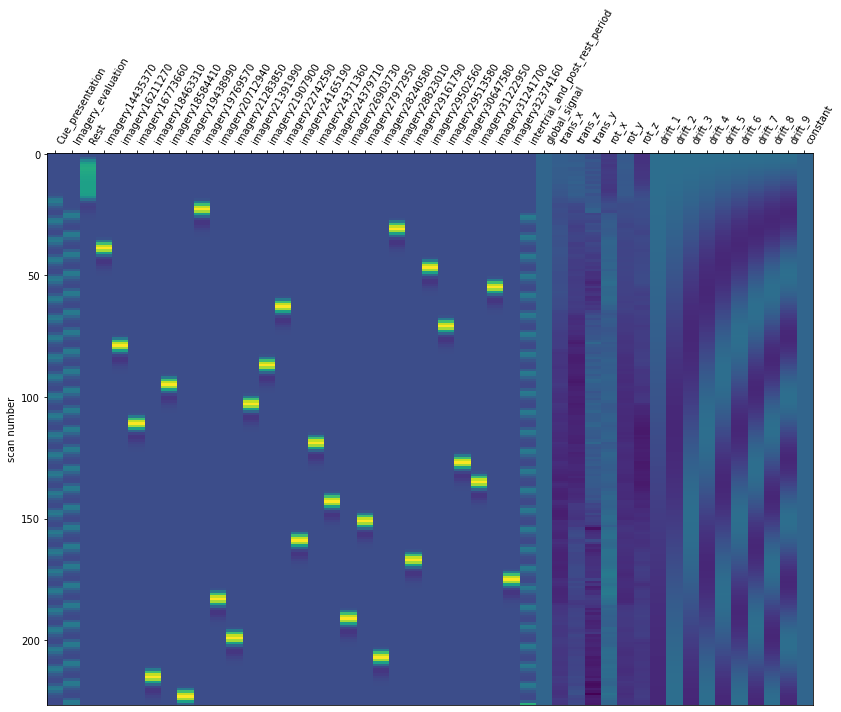

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
design_matrix = fmri_glm.design_matrices_[0]
from nilearn.plotting import plot_design_matrix
plot_design_matrix(design_matrix)


We can also plot the expected response for a given category. This tells us at which time there was a BOLD response for the respective category.

Text(0.5, 1.0, 'Expected Response for category 14435370')

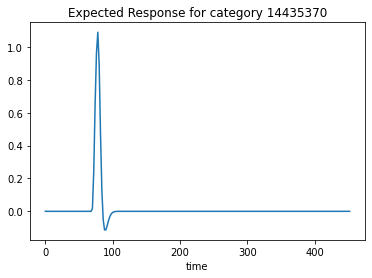

In [17]:
plt.plot(design_matrix['imagery14435370'])
plt.xlabel('time')
plt.title('Expected Response for category 14435370')


We can now save the design matrix in a dedicated folder.

outdir = '/mnt/c/Users/janos/OneDrive/Dokumente/Frankfurt Master/Forschungsmodul/Design_matrix'
from os.path import join
plot_design_matrix(design_matrix, output_file=join(outdir, 'design_matrix.png'))

### **2.0 Detection of significant voxels**

In order to estimate our Betas of the GLM, we need to calculate the contrasts for all conditions. By doing this, we are weighting the columns to discover the associated statistics.

This requires some data wrangling. First, we need to extract all unique values from our *event* file, so we only have the stimuli presented in the paradigm. Then we remove the one NaN from this list. After that, we will create the variable **conditions**. This list containts the prefix "active", so we know we are dealing with an activated brain region and is added by the respective condition name.

Then an array of the length of all regressors is created. For each of our regressors of interest, so for all our conditions, i.e. imagery stimuli, a weight is assigned. This is then combined into a dictionary, so it can serve as in input to the nilearn function **plot_contrast_matrix**.

In [117]:
import math
con = events.category_id.unique().tolist()

con_no_NaN = [item for item in con if not(math.isnan(item)) == True]
 


In [115]:
conditions = ['spaceholder']*len(con_no_NaN)
for pos, x in enumerate(con_no_NaN):
    conditions[pos] = 'active -' + str(x)

In [118]:
from numpy import array
array_a = array([0]*design_matrix.shape[1])
array_a[0] = 1

arr = []
i = 1
while i < len(condition)+1:
    arr.append(array_a)
    if len(arr) >= i:
        array_a = array([0]*design_matrix.shape[1])
        array_a[i] = 1
        i = i+1
    else:
        array_a = array([0]*design_matrix.shape[1])
        i=i+1
        continue
   

In [119]:
condition = dict.fromkeys(conditions)

In [120]:
i=0
for k,x in condition.items():
    condition[k] = arr[i]
    i=i+1


In [124]:
condition

{'active -1976957.0': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]),
 'active -2882301.0': array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]),
 'active -1443537.0': array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]),
 'active -2950256.0': array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]),
 'active -3124170.0': array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]),
 'active -2274259.0': array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0

After finishing the data wrangling, it is finally time to compute the contrasts and plot the coefficients.

<AxesSubplot:label='conditions'>

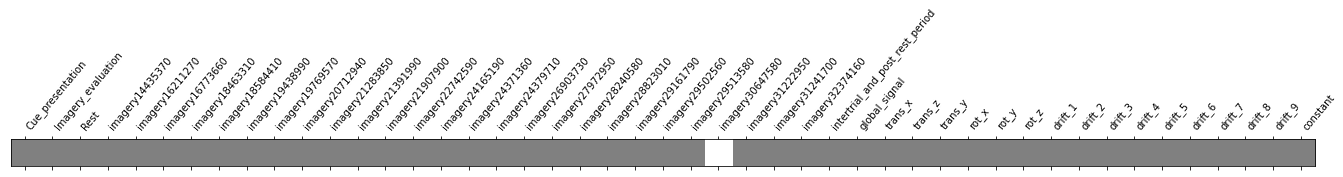

In [134]:
from nilearn.plotting import plot_contrast_matrix
plot_contrast_matrix(condition['active -1943899.0'], design_matrix=design_matrix)


